<a href="https://colab.research.google.com/github/SonamTenzin7/Binary-Classification/blob/main/Diabetes_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving data.csv to data (13).csv


In [ ]:
# reading data
data = pd.read_csv("data.csv")

In [ ]:
# check data shape
data.shape

(769, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               769 non-null    int64  
 1   Glucose                   769 non-null    int64  
 2   BloodPressure             769 non-null    int64  
 3   SkinThickness             769 non-null    int64  
 4   Insulin                   769 non-null    int64  
 5   BMI                       769 non-null    float64
 6   DiabetesPedigreeFunction  769 non-null    float64
 7   Age                       769 non-null    int64  
 8   Outcome                   769 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.2 KB


In [ ]:
data = data.drop(data.columns[0],axis=1)

In [ ]:
data.isnull().sum()

,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# check data duplicates
duplicates = data[data.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")
print("Duplicate Rows:")
duplicates

Number of duplicate rows: 0
Duplicate Rows:


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [ ]:
# Check value is 0 or not
(data == 0).any()

,0
Glucose,True
BloodPressure,True
SkinThickness,True
Insulin,True
BMI,True
DiabetesPedigreeFunction,False
Age,False
Outcome,True


In [ ]:
# Remove rows where 'bmi' is 0
data = data[data['BMI'] != 0]

In [ ]:
# Remove rows where 'skin thickness' is 0
data = data[data['SkinThickness'] != 0]

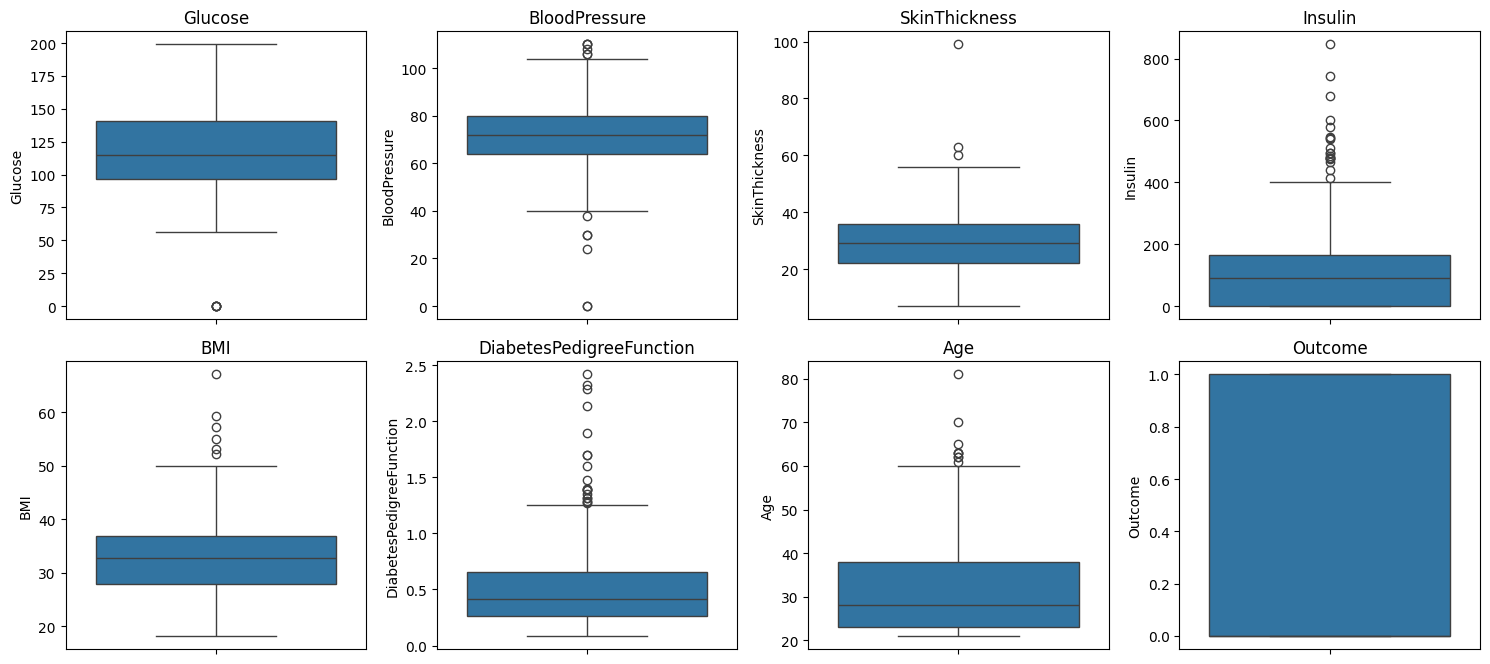

Outliers (IQR):


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,2.288,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
761,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,NaN,NaN,NaN,NaN,NaN,NaN,63.0,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Box plot for outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns):
  plt.subplot(3, 4, i + 1)  # Adjust the subplot grid as needed
  sns.boxplot(y=data[col])
  plt.title(col)

plt.tight_layout()
plt.show()


# Using IQR (Interquartile Range) to identify outliers
def find_outliers_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))]
  return outliers

# Example usage:
outliers_df = find_outliers_iqr(data)
print("Outliers (IQR):")
outliers_df


Original Data Shape: (430, 8)
Data Shape After Removing Outliers: (416, 8)


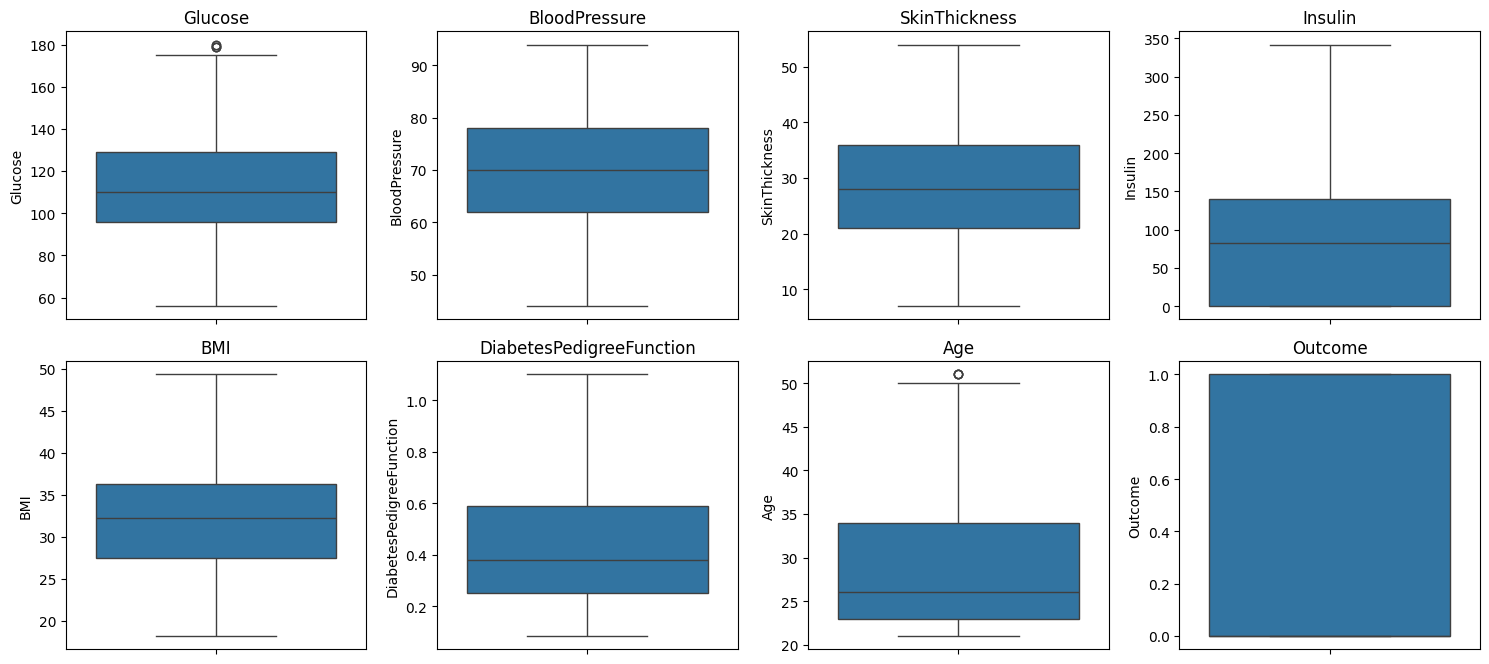

In [ ]:
# Using IQR (Interquartile Range) to identify and remove outliers
def remove_outliers_iqr(data):
  for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
  return data

data_no_outliers = remove_outliers_iqr(data)

# Print the shape of the dataframe before and after removing outliers
print(f"Original Data Shape: {data.shape}")
print(f"Data Shape After Removing Outliers: {data_no_outliers.shape}")


# Box plot for outlier detection after removal
plt.figure(figsize=(15, 10))
for i, col in enumerate(data_no_outliers.columns):
  plt.subplot(3, 4, i + 1)
  sns.boxplot(y=data_no_outliers[col])
  plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
data = data_no_outliers

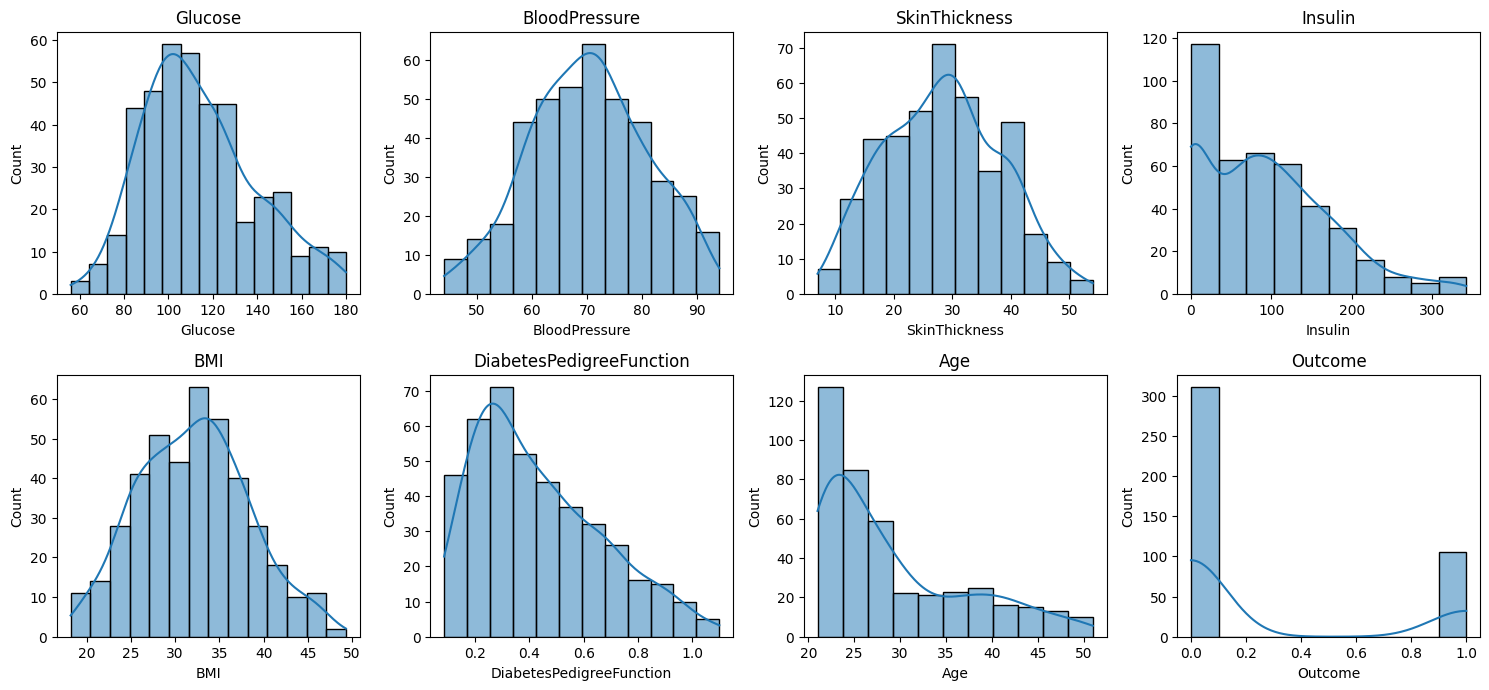

In [ ]:
# Plot bar graph to check skewness for each numerical feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.select_dtypes(include=np.number).columns):
  plt.subplot(3, 4, i + 1)
  sns.histplot(data[col], kde=True)  # Use histplot for bar graph with kde for distribution
  plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,416.0,114.024038,25.372396,56.000,96.0000,110.0000,129.0000,180.000
BloodPressure,416.0,70.218750,10.635595,44.000,62.0000,70.0000,78.0000,94.000
SkinThickness,416.0,28.408654,9.841213,7.000,21.0000,28.0000,36.0000,54.000
Insulin,416.0,91.694712,80.564189,0.000,0.0000,82.5000,140.0000,342.000
BMI,416.0,32.101923,6.231188,18.200,27.5000,32.2500,36.3250,49.300
DiabetesPedigreeFunction,416.0,0.434841,0.235364,0.085,0.2505,0.3805,0.5915,1.101
Age,416.0,29.168269,8.015681,21.000,23.0000,26.0000,34.0000,51.000
Outcome,416.0,0.252404,0.434915,0.000,0.0000,0.0000,1.0000,1.000


In [ ]:
# splitting the data
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size as needed


# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# Neural Network model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)
print('Loss:', loss)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.7538 - loss: 0.6045 - val_accuracy: 0.7164 - val_loss: 0.5563
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7123 - loss: 0.5602 - val_accuracy: 0.7164 - val_loss: 0.5108
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7892 - loss: 0.4652 - val_accuracy: 0.7313 - val_loss: 0.4936
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7653 - loss: 0.4592 - val_accuracy: 0.7313 - val_loss: 0.4627
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7984 - loss: 0.4313 - val_accuracy: 0.7463 - val_loss: 0.4464
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7734 - loss: 0.4254 - val_accuracy: 0.7761 - val_loss: 0.4311
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8088 - loss: 0.4021 - val_accuracy: 0.7761 - val_loss: 0.4303
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7902 - loss: 0.4270 - val_accuracy: 0.7761 - val_loss: 0.4327
Epoch 9/50
9/9 ━━━

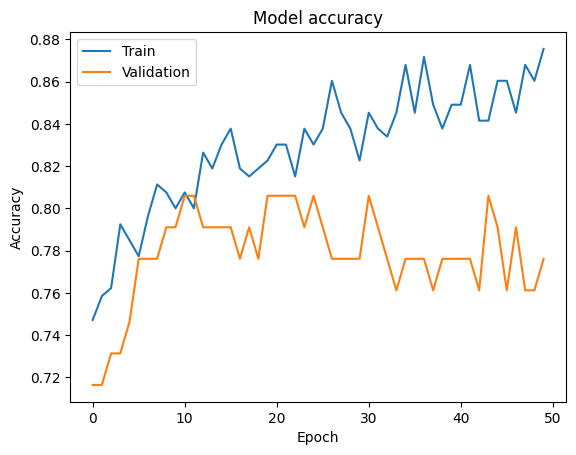

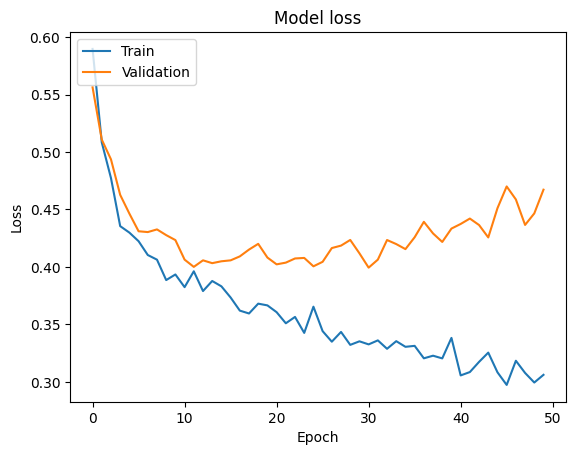

In [ ]:

# Ploting training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Ploting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()